<a href="https://colab.research.google.com/github/utomoreza/emailnetwork/blob/main/Email_Network_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome! Let's try to use `emailnetwork` package!

## Environment Set Up

First of all, you need to fork the Github repository. [Here](https://github.com/onlyphantom/emailnetwork) is the link. Then you can clone your forking result to your current working environment (I'll use colab for the demo).

In [ ]:
!git clone https://github.com/onlyphantom/emailnetwork.git

Let's start to install `emailnetwork` package!

In [ ]:
!pip install emailnetwork

Before we use the package, we will need sample `.mbox` file to work with. The sample has been provided in the `emailnetwork/tests/test.mbox` directory. However, you can also use your own mailbox by exporting it first using [Google Takeout Service](https://takeout.google.com/settings/takeout) to analyze it. 

NB: you must use Gmail in order to do it.

You can also choose the desired email categories you want to analyze in the Google Takeout Service. 

Since the exporting process needs time (depends on your mailbox size), we will use the sample `.mbox` for the demo today.

In [ ]:
# Let's read the mbox file and check how many emails there are in the file
from emailnetwork.extract import MBoxReader
reader = MBoxReader('/content/emailnetwork/emailnetwork/tests/test.mbox')
print(f'{len(reader)} emails in the sample mbox.')

140 emails in the sample mbox.


## Extract Emails

Among those 140 emails, we can analyze a specific email:

In [ ]:
# Extract a specific email
from emailnetwork.extract import extract_meta
email = reader.mbox[5]
emailmsg = extract_meta(email)

# Print email domains of recipients
print(emailmsg.recipients)
print(emailmsg.recipients[0].domain)

[EmailAddress(name='', email='samuelchan@gmail.com')]
gmail.com


In [ ]:
# Other things you can get from a specific email
print(emailmsg.cc)
print(emailmsg.date)
print(emailmsg.origin_domain)
print(emailmsg.sender)
print(emailmsg.subject)

[]
2016-06-22 18:39:19
accounts.google.com
EmailAddress(name='Google', email='no-reply@accounts.google.com')
New sign-in from Chrome on Mac


In [ ]:
# Extract body of a specific email
from emailnetwork.extract import extract_body
emailbody = extract_body(email)

# Print email subject & body
print(f'Subject : {emailbody.subject}')
print(f'Body : {emailbody.body}')

Subject : New sign-in from Chrome on Mac
Body : New sign-in from Chrome on Mac



Hi Leopold,
Your Google Account leopold.wentzel@gmail.com was just used to sign in from
Chrome on Mac.

Leopold Wentzel
leopold.wentzel@gmail.com

Mac
Wednesday, June 22, 2016 2:39 PM (Eastern Daylight Time)
Washington, DC, USA*
Chrome*Don't recognize this activity?*
Review your recently used devices
<https://accounts.google.com/AccountChooser?Email=leopold.wentzel@gmail.com&continue=https://security.google.com/settings/security/activity/nt/1466620759000?rfn%3D31%26rfnc%3D1%26asae%3D2>
now.

Why are we sending this? We take security very seriously and we want to
keep you in the loop on important actions in your account.
We were unable to determine whether you have used this browser or device
with your account before. This can happen when you sign in for the first
time on a new computer, phone or browser, when you use your browser's
incognito or private browsing mode or clear your cookies, or when somebody

## Filter E-mail

In [ ]:
# Filter emails by certain date
lastyearmails = reader.filter_emails(datestring='2020-01-01', dateoperator='>=')
lastyearmails

[EmailMeta(sender=EmailAddress(name='Gmail Team', email='mail-noreply@google.com'), subject='Three tips to get the most out of Gmail', date=datetime.datetime(2020, 4, 17, 14, 33, 56), recipients=[EmailAddress(name='Samuel Wentzel', email='samuelchan@gmail.com')], cc=[], origin_domain='google.com'),
 EmailMeta(sender=EmailAddress(name='Gmail Team', email='mail-noreply@google.com'), subject="Stay more organized with Gmail's inbox", date=datetime.datetime(2020, 8, 13, 14, 33, 56), recipients=[EmailAddress(name='Samuel Wentzel', email='samuelchan@gmail.com')], cc=[], origin_domain='google.com'),
 EmailMeta(sender=EmailAddress(name='Gmail Team', email='mail-noreply@google.com'), subject='The best of Gmail, wherever you are', date=datetime.datetime(2020, 8, 13, 14, 33, 56), recipients=[EmailAddress(name='Samuel Wentzel', email='samuelchan@gmail.com')], cc=[], origin_domain='google.com'),
 EmailMeta(sender=EmailAddress(name='WordPress.com', email='donotreply@wordpress.com'), subject='Activate

## Graphs

Introduction:

- Each node represents one person's email.
- Edges represent the connection between them.
- Directed Graph vs Undirected Graph:
  * Directed Graph : graph that has edges with **direction**. The edges represent **one-way relationship**. In this case, we know who sent the email to whom.
  * Undirected Graph : graph that has edges with **no direction**. The edges represent **two-ways relationship**. In this case, we just know that they have been connected through the email, but we don't know who sent the email to whom.

### Single Directed Graph

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


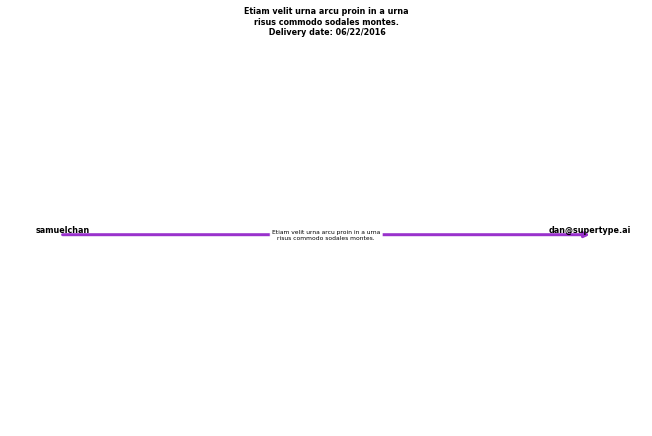

In [ ]:
from emailnetwork.graph import plot_directed, plot_undirected, plot_single_directed, plot_single_undirected

# Try to plot a single directed graph
plot_single_directed(reader,12, showtitle=True)

From the graph above, we know that `samuelchan` sent an email to `dan@supertype.ai` on 22/6/2016. Let's prove it:

In [ ]:
# Extract the email with index 12
from emailnetwork.extract import extract_meta
email = reader.mbox[12]
emailmsg = extract_meta(email)

# Prove the graph
print(f'The email sender is {emailmsg.sender.email}.')
print(f'The email recipient is {emailmsg.recipients[0].email}.')
print(f'The email was sent on {emailmsg.date}.')

The email sender is samuelchan@gmail.com.
The email recipient is dan@supertype.ai.
The email was sent on 2016-06-22 19:27:00.


### Single Undirected Graph

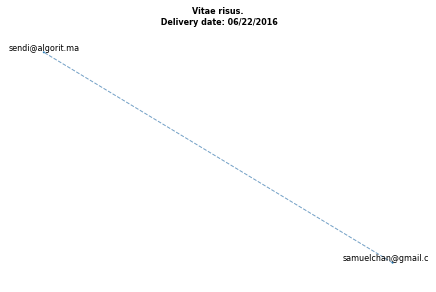

In [ ]:
# Try to plot a single undirected graph
plot_single_undirected(reader, 130, showtitle=True)

As mentioned before, we can only know that there was an email between `samuelchan@gmail.com` & `sendi@algorit.ma` on 22/06/2016, but we don't know who sent the email to whom. In order to check it we must use directed graph: 

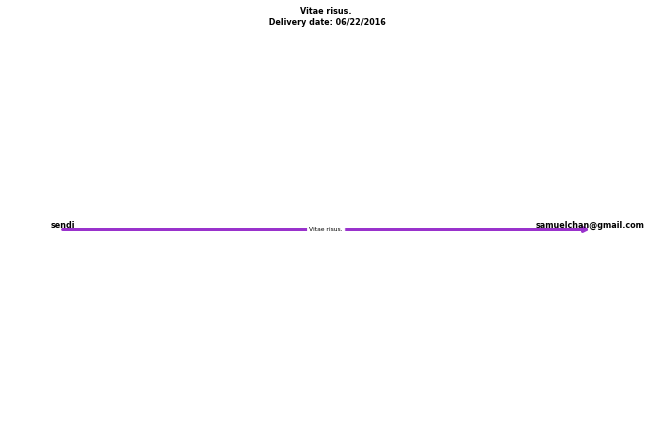

In [ ]:
# Plot the single directed graph
plot_single_directed(reader, 130, showtitle=True)

So, `sendi` sent the email to `samuelchan@gmail.com` on that day.

### Directed Graphs

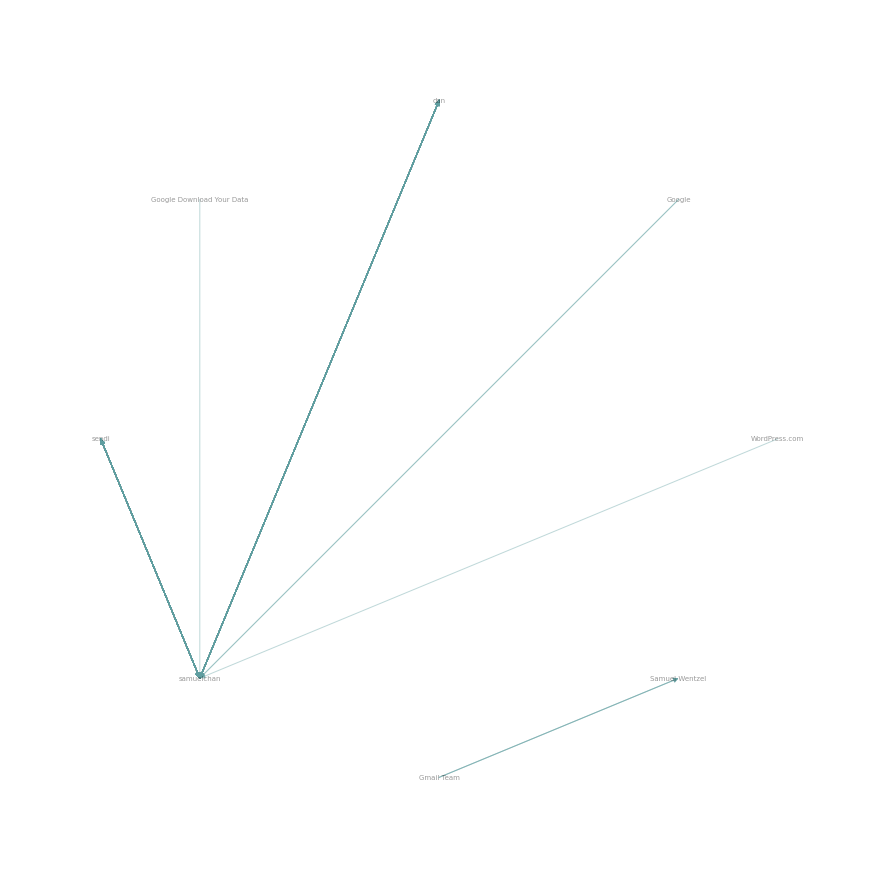

In [ ]:
# Plot a directed graph, optionally specifying a layout style
plot_directed(reader, layout='shell', graphml=False)

### Undirected Graphs

Graphml exported as network-15e9f81a.graphml


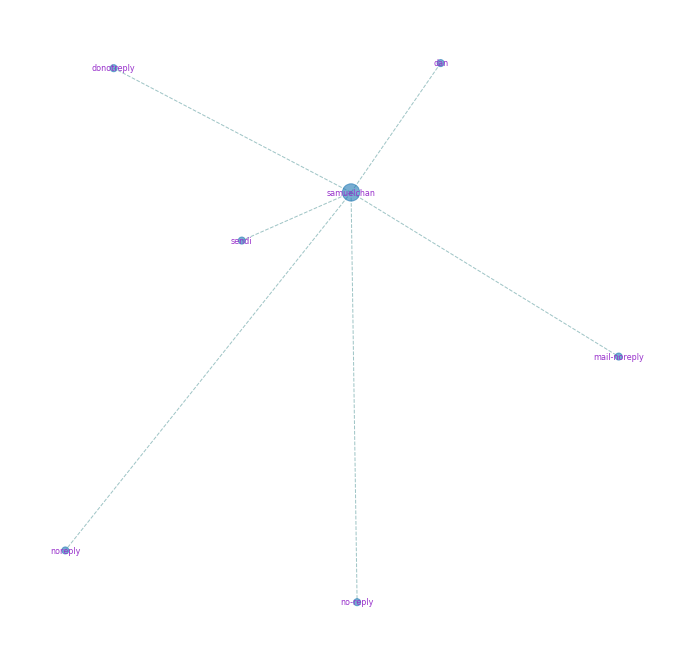

In [ ]:
# optionally export a .graphml to your working directory for use
# in other network / graphing software
plot_undirected(reader, layout='spring', graphml=True)

## E-mail Summary

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


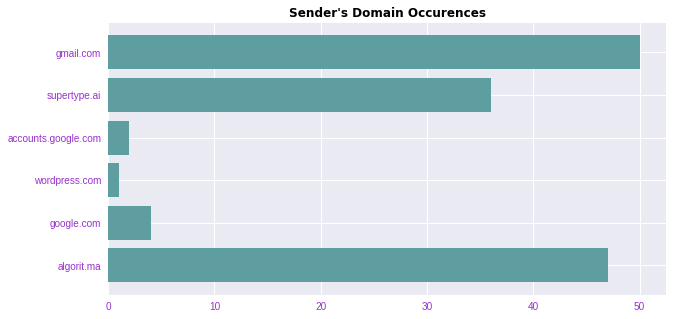

In [ ]:
# Sender domain summary
from emailnetwork.summary import DomainSummary
summary = DomainSummary(reader)
summary.plot();

In [ ]:
summary.summary

Counter({'accounts.google.com': 2,
         'algorit.ma': 47,
         'gmail.com': 50,
         'google.com': 4,
         'supertype.ai': 36,
         'wordpress.com': 1})

We know that most of the sender are from `gmail.com` & `algorit.ma`. 

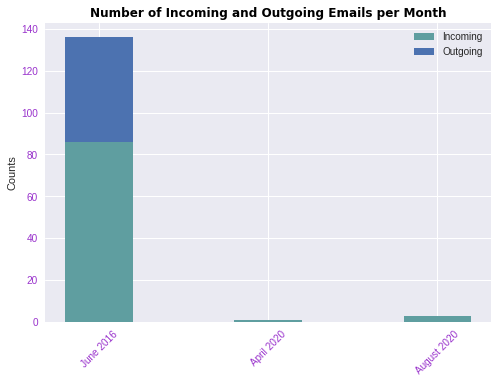

In [ ]:
# Incoming & outgoing summary
from emailnetwork.summary import IncomingOutgoingSummary
inout_summary = IncomingOutgoingSummary(reader)
inout_summary.plot();

In [ ]:
inout_summary.summary

{'April 2020': {'Incoming': 1, 'Outgoing': 0},
 'August 2020': {'Incoming': 3, 'Outgoing': 0},
 'June 2016': {'Incoming': 86, 'Outgoing': 50}}

You can track the traffic of your own email using this function, this must be very helpful for a big company email maintanance. For example we know, in the sample mailbox, the user has sent & got a lot of emails on June 2016 but suddenly there was no email at all, and maybe he got back to business on August 2020.

### Header Analysis

Header analysis is a usual thing to be done in order to detect malware or spam detection on the emails.

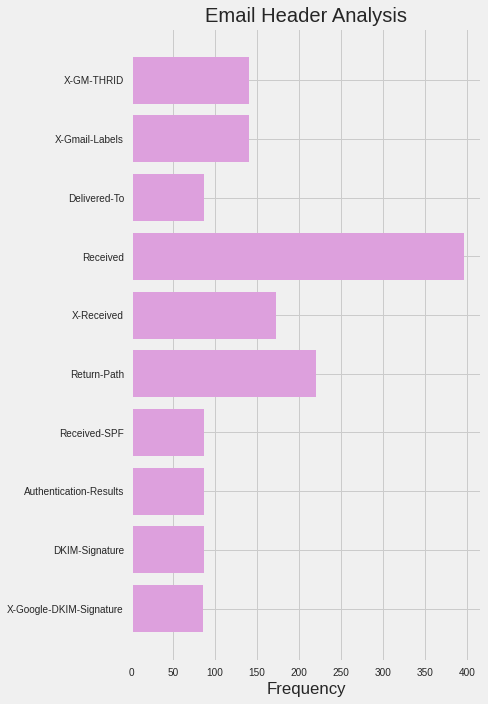

In [ ]:
from emailnetwork.header import HeaderCounter
header = HeaderCounter(reader)
header.histogram(n=10)

## Let's Try to Analyze Your Exported E-mail!

NB: do not run the code below, unless you have uploaded your exported `Sent.mbox` to your current working directory

In [ ]:
# Read the e-mail
from emailnetwork.extract import MBoxReader
reader_sent = MBoxReader('/content/Sent.mbox')
print(f'{len(reader_sent)} emails in the sample mbox.')

87 emails in the sample mbox.


In [ ]:
# Filter emails by certain date
lastyearmails = reader_sent.filter_emails(datestring='2020-01-01', dateoperator='>=')
lastyearmails[2:4]

[EmailMeta(sender=EmailAddress(name='Aurellia Christie', email='aurelliachristie77@gmail.com'), subject='Fwd: Invitation: Discuss project TAM @ Fri Apr 30, 2021 3pm - 3:30pm (WIB) (aurelliachristie77@gmail.com)', date=datetime.datetime(2021, 4, 30, 5, 53, 44), recipients=[EmailAddress(name='Gerald Bryan', email='geraldbryan9914@gmail.com')], cc=[], origin_domain='gmail.com'),
 EmailMeta(sender=EmailAddress(name='', email='ajeng@algorit.ma'), subject='Invitation: Discuss project TAM @ Fri Apr 30, 2021 3pm - 3:30pm (WIB) (aurelliachristie77@gmail.com)', date=datetime.datetime(2021, 4, 29, 10, 8, 29), recipients=[EmailAddress(name='', email='aurelliachristie77@gmail.com'), EmailAddress(name='', email='ahmad@algorit.ma')], cc=[], origin_domain='algorit.ma')]

### Graphs

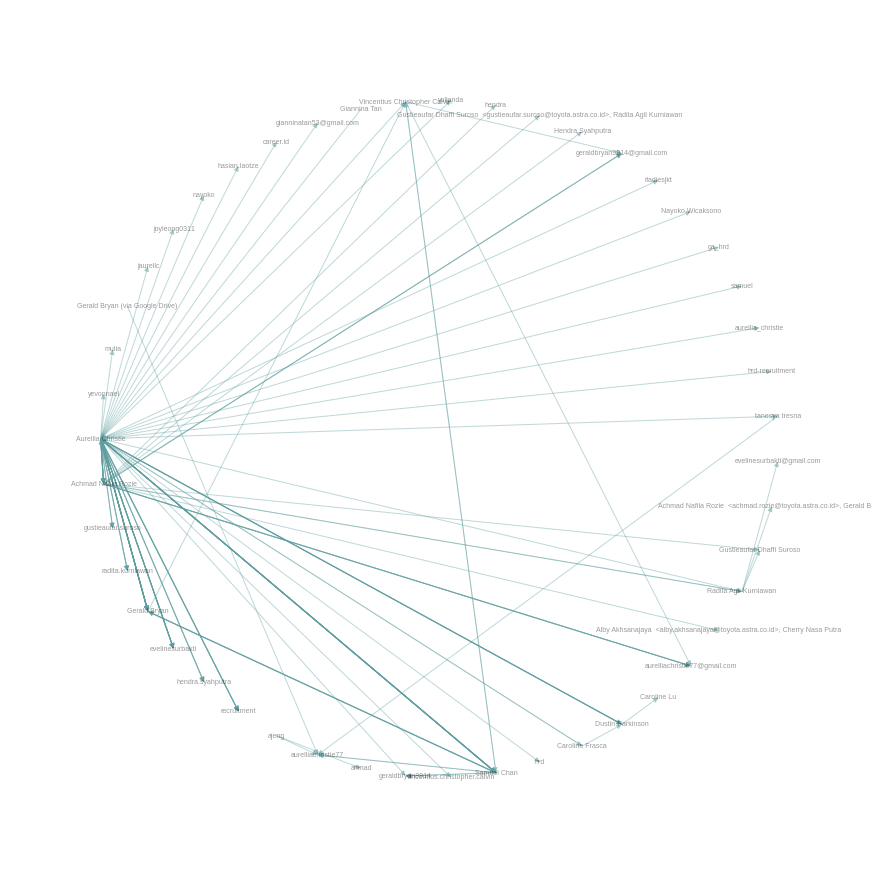

In [ ]:
# Directed Graph
from emailnetwork.graph import plot_directed, plot_undirected
plot_directed(reader_sent)

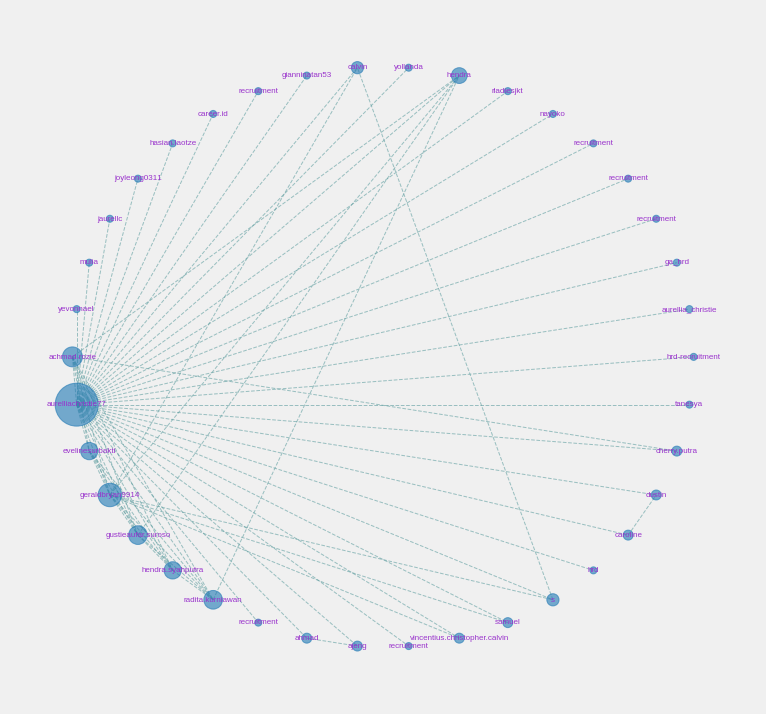

In [ ]:
# Undirected Graph
plot_undirected(reader_sent)

### Header Analysis

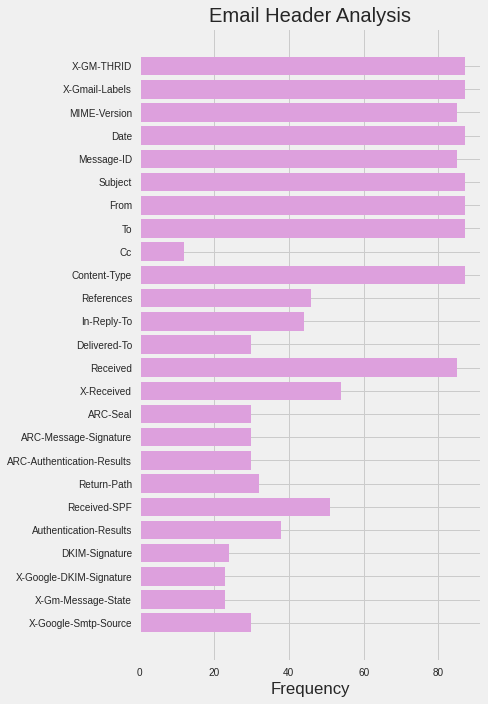

In [ ]:
from emailnetwork.header import HeaderCounter
headers = HeaderCounter(reader_sent)
headers.histogram()

In [ ]:
# Filter header that contains word "spam" in it
spamheaders = list(filter(lambda v: "spam" in v.lower(), headers.keys()))
spamheaders

[]

## E-mail Summary

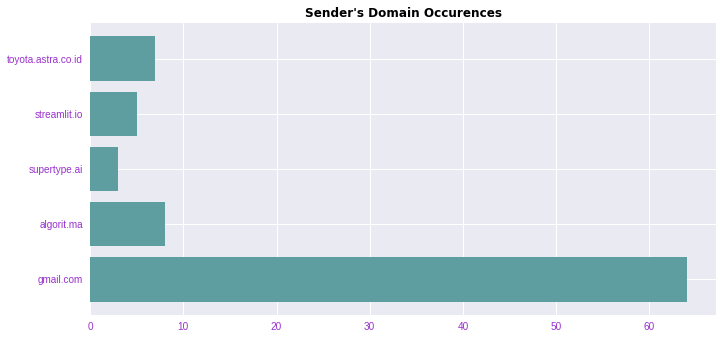

In [ ]:
# Sender domain summary
from emailnetwork.summary import DomainSummary
summary_sent = DomainSummary(reader_sent)
summary_sent.plot();

In [ ]:
summary_sent.summary

Counter({'algorit.ma': 8,
         'gmail.com': 64,
         'streamlit.io': 5,
         'supertype.ai': 3,
         'toyota.astra.co.id': 7})

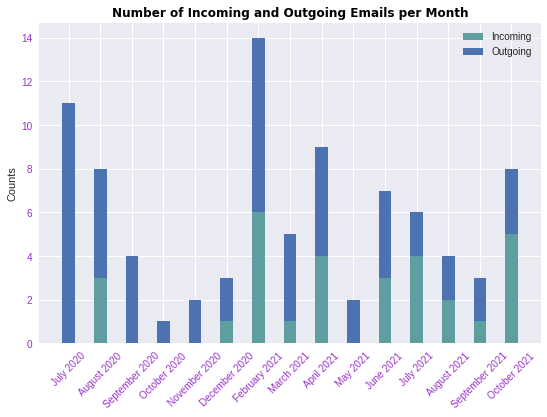

In [ ]:
# Incoming & outgoing summary
from emailnetwork.summary import IncomingOutgoingSummary
inout_summary_sent = IncomingOutgoingSummary(reader_sent)
inout_summary_sent.plot();

In [ ]:
inout_summary_sent.summary

{'April 2021': {'Incoming': 4, 'Outgoing': 5},
 'August 2020': {'Incoming': 3, 'Outgoing': 5},
 'August 2021': {'Incoming': 2, 'Outgoing': 2},
 'December 2020': {'Incoming': 1, 'Outgoing': 2},
 'February 2021': {'Incoming': 6, 'Outgoing': 8},
 'July 2020': {'Incoming': 0, 'Outgoing': 11},
 'July 2021': {'Incoming': 4, 'Outgoing': 2},
 'June 2021': {'Incoming': 3, 'Outgoing': 4},
 'March 2021': {'Incoming': 1, 'Outgoing': 4},
 'May 2021': {'Incoming': 0, 'Outgoing': 2},
 'November 2020': {'Incoming': 0, 'Outgoing': 2},
 'October 2020': {'Incoming': 0, 'Outgoing': 1},
 'October 2021': {'Incoming': 5, 'Outgoing': 3},
 'September 2020': {'Incoming': 0, 'Outgoing': 4},
 'September 2021': {'Incoming': 1, 'Outgoing': 2}}

## Any Questions?

- LinkedIn : Aurellia Christie
- Github : AurelliaChristie